In [1]:
from mp1 import generate_dataset_classification
from mp1 import generate_a_disk
from keras.models import Sequential
from keras.layers import Dense, Activation
from pandas import get_dummies

import matplotlib.pyplot as plt
import keras
import numpy as np

Using TensorFlow backend.


# Dataset Generation

In [2]:
[x_train, t_train] = generate_dataset_classification(300, 20)
t_train = get_dummies(t_train).values

x_test = generate_a_disk()
x_test = np.expand_dims(x_test, axis=0)

# Classification with SGD

In [3]:
model_sgd = Sequential([
        Dense(3, input_dim=10000),
        Activation('softmax'),
    #Dense(1000, input_dim=10000),
    #Activation('relu'),
    #Dense(500),
    #Activation('relu'),
    #Dense(100),
    #Activation('relu'),
    #Dense(3),
    #Activation('softmax'),
])

sgd = keras.optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model_sgd.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print('Training ------------')
model_sgd.fit(x_train, t_train, epochs=20, batch_size=32)

Training ------------
Epoch 1/20
300/300 [==============================] - 2s 8ms/step - loss: 2.4659 - acc: 0.4133
Epoch 2/20
300/300 [==============================] - 0s 246us/step - loss: 1.3240 - acc: 0.5400
Epoch 3/20
300/300 [==============================] - 0s 289us/step - loss: 0.5886 - acc: 0.7967
Epoch 4/20
300/300 [==============================] - 0s 273us/step - loss: 0.6053 - acc: 0.7467
Epoch 5/20
300/300 [==============================] - 0s 289us/step - loss: 0.3803 - acc: 0.8733
Epoch 6/20
300/300 [==============================] - 0s 249us/step - loss: 0.1937 - acc: 0.9300
Epoch 7/20
300/300 [==============================] - 0s 233us/step - loss: 0.1980 - acc: 0.9200
Epoch 8/20
300/300 [==============================] - 0s 249us/step - loss: 0.1788 - acc: 0.9500
Epoch 9/20
300/300 [==============================] - 0s 273us/step - loss: 0.2612 - acc: 0.8867
Epoch 10/20
300/300 [==============================] - 0s 249us/step - loss: 0.1218 - acc: 0.9700
Epoch 11/

# Classification with Adam

In [4]:
model_adam = Sequential([
        Dense(3, input_dim=10000),
        Activation('softmax'),
    
    #Dense(1000, input_dim=10000),
    #Activation('relu'),
    #Dense(500),
    #Activation('relu'),
    #Dense(100),
    #Activation('relu'),
    #Dense(3),
    #Activation('softmax'),
])

adam = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_adam.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print('Training ------------')
model_adam.fit(x_train, t_train, epochs=20, batch_size=32)

Training ------------
Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 2.2710 - acc: 0.3967
Epoch 2/20
300/300 [==============================] - 0s 309us/step - loss: 0.7085 - acc: 0.7100
Epoch 3/20
300/300 [==============================] - 0s 289us/step - loss: 0.4305 - acc: 0.7933
Epoch 4/20
300/300 [==============================] - 0s 256us/step - loss: 0.3666 - acc: 0.8300
Epoch 5/20
300/300 [==============================] - 0s 283us/step - loss: 0.4551 - acc: 0.8000
Epoch 6/20
300/300 [==============================] - 0s 256us/step - loss: 0.3057 - acc: 0.8233
Epoch 7/20
300/300 [==============================] - 0s 263us/step - loss: 0.1884 - acc: 0.9400
Epoch 8/20
300/300 [==============================] - 0s 276us/step - loss: 0.1420 - acc: 0.9900
Epoch 9/20
300/300 [==============================] - 0s 312us/step - loss: 0.1167 - acc: 1.0000
Epoch 10/20
300/300 [==============================] - 0s 326us/step - loss: 0.1064 - acc: 1.0000
Epoch 11/

# Test

In [5]:
print(model_sgd.predict(x_test))
print(model_adam.predict(x_test))

[[ 0.  1.  0.]]
[[ 0.  1.  0.]]


# Visualization: model trained by SGD

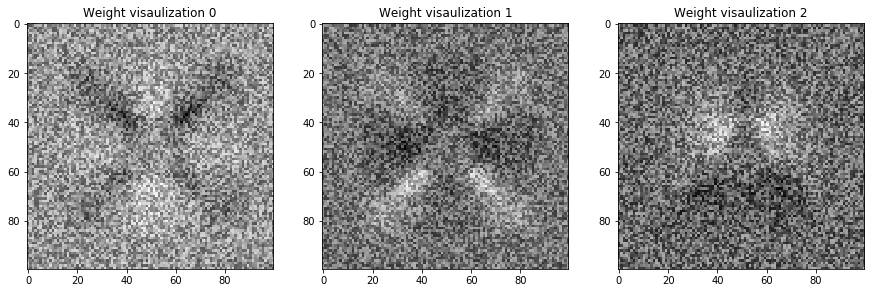

In [6]:
%matplotlib inline

weights = model_sgd.get_weights()[0]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for idx in range(3):
    ax[idx].imshow(np.reshape(weights[:, idx], (100, 100)), cmap='gray')
    ax[idx].set_title('Weight visaulization '+str(idx))
plt.show()

# Visualization: model trained by Adam

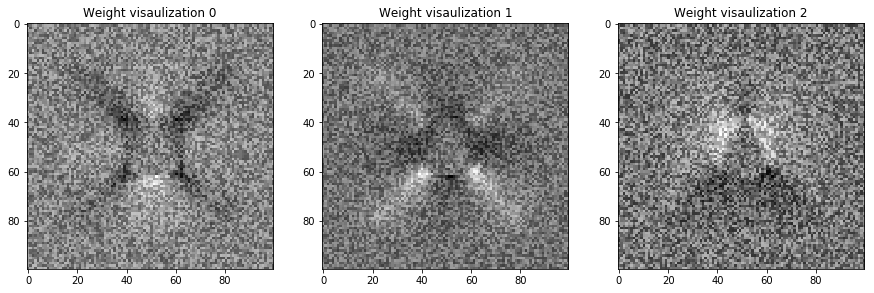

In [7]:
%matplotlib inline

weights = model_adam.get_weights()[0]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for idx in range(3):
    ax[idx].imshow(np.reshape(weights[:, idx], (100, 100)), cmap='gray')
    ax[idx].set_title('Weight visaulization '+str(idx))
plt.show()